In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import re
%matplotlib inline

import numpy as np 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('/content/drive/My Drive/gender project/Gender-prediction(all).csv',error_bad_lines=False)
df


,FullName,Gender
0,শ্বরিয়া ঘোষ,নারী
1,শিকা খায়ের এশা,নারী
2,এশা ধর,নারী
3,শিতা সুর আপন,নারী
4,র্মি সেন,নারী
...,...,...
5743,হোসেন বেপারি,পুরুষ
5744,হ্যান্ডরি জিতু,পুরুষ
5745,হ্যাপি আক্তার,নারী
5746,হ্যাপি রিচিল,নারী


In [ ]:
df['FullName'] = df['FullName'].apply((lambda x: re.sub('[,?'']','',x)))

In [ ]:
max_fatures = 2500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['FullName'].values)
X = tokenizer.texts_to_sequences(df['FullName'].values)
X = pad_sequences(X)

In [ ]:
X

array([[   0,    0,    0, 1574,   41],
       [   0,    0, 1575,  949,  475],
       [   0,    0,    0,  475,  637],
       ...,
       [   0,    0,    0, 1573,    4],
       [   0,    0,    0, 1573,  132],
       [   0,    0,    0,    0,  781]], dtype=int32)

In [ ]:
np.shape(X)

(5748, 5)

In [ ]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 64)             160000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 5, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 193,154
Trainable params: 193,154
Non-trainable params: 0
_________________________________________________________________
None


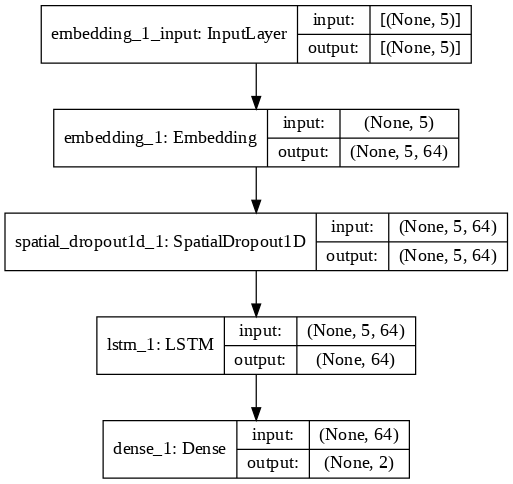

In [ ]:
import tensorflow.keras as keras
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:

Y = pd.get_dummies(df['Gender']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4598, 5) (4598, 2)
(1150, 5) (1150, 2)


In [ ]:
history=model.fit(X_train, Y_train, epochs = 10, batch_size=32, verbose = 2,validation_split=0.1)

Epoch 1/10
130/130 - 8s - loss: 0.6394 - acc: 0.6182 - val_loss: 0.4620 - val_acc: 0.7935
Epoch 2/10
130/130 - 3s - loss: 0.3709 - acc: 0.8279 - val_loss: 0.3750 - val_acc: 0.8261
Epoch 3/10
130/130 - 3s - loss: 0.2365 - acc: 0.8942 - val_loss: 0.3767 - val_acc: 0.8304
Epoch 4/10
130/130 - 3s - loss: 0.1922 - acc: 0.9113 - val_loss: 0.3811 - val_acc: 0.8261
Epoch 5/10
130/130 - 3s - loss: 0.1773 - acc: 0.9161 - val_loss: 0.3883 - val_acc: 0.8391
Epoch 6/10
130/130 - 3s - loss: 0.1619 - acc: 0.9190 - val_loss: 0.4287 - val_acc: 0.8261
Epoch 7/10
130/130 - 3s - loss: 0.1555 - acc: 0.9219 - val_loss: 0.4081 - val_acc: 0.8370
Epoch 8/10
130/130 - 3s - loss: 0.1492 - acc: 0.9188 - val_loss: 0.4178 - val_acc: 0.8196
Epoch 9/10
130/130 - 3s - loss: 0.1436 - acc: 0.9212 - val_loss: 0.4443 - val_acc: 0.8326
Epoch 10/10
130/130 - 3s - loss: 0.1424 - acc: 0.9178 - val_loss: 0.4392 - val_acc: 0.8370


In [ ]:
score = model.evaluate(X_train, Y_train,
                       batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

72/72 - 0s - loss: 0.1561 - acc: 0.9230
Train loss: 0.15609954297542572
Train accuracy: 0.923009991645813


In [ ]:
score = model.evaluate(X_test, Y_test,
                       batch_size=64, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18/18 - 0s - loss: 0.4478 - acc: 0.8252
Test loss: 0.4478147327899933
Test accuracy: 0.8252173662185669


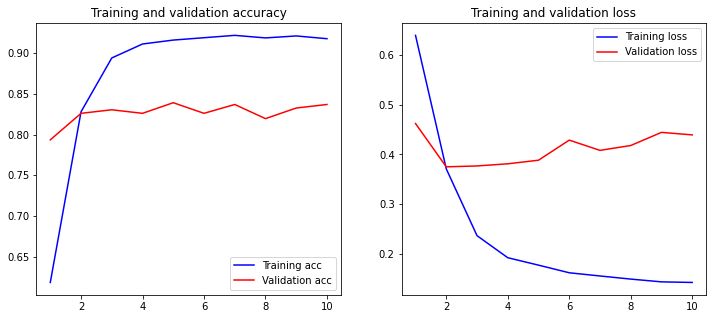

In [ ]:

import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)